In [2]:
# importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# chargement des données depuis le fichier csv
df = pd.read_csv("covid-19-all.csv")
df.info()

/tmp/ipykernel_4744/3989146778.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("covid-19-all.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241952 entries, 0 to 1241951
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Country/Region  1070891 non-null  object 
 1   Province/State  1018741 non-null  object 
 2   Latitude        1070890 non-null  float64
 3   Longitude       1070890 non-null  float64
 4   Confirmed       1241933 non-null  float64
 5   Recovered       1241566 non-null  float64
 6   Deaths          1241520 non-null  float64
 7   Date            1241952 non-null  object 
dtypes: float64(5), object(3)
memory usage: 75.8+ MB


In [4]:
df.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,NaN,NaN,NaN,NaN,51526.0,41727.0,2191.0,2021-01-01
1,NaN,NaN,NaN,NaN,58316.0,33634.0,1181.0,2021-01-01
2,NaN,NaN,NaN,NaN,99897.0,67395.0,2762.0,2021-01-01
3,NaN,NaN,NaN,NaN,8117.0,7463.0,84.0,2021-01-01
4,NaN,NaN,NaN,NaN,17568.0,11146.0,405.0,2021-01-01


In [14]:
# informations sur le dataset
print("======================================== Dimensension du dataset =================================", df.shape)
print("\n\n======================================== Informations du dataset =================================\n\n")
print(df.info())
print("\n\n======================================== Statistiques du dataset =================================\n\n")
print(df.describe(include="all").T)


======================================== Dimensension du dataset ================================= (1241952, 8)


======================================== Informations du dataset =================================


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241952 entries, 0 to 1241951
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Country/Region  1070891 non-null  object 
 1   Province/State  1018741 non-null  object 
 2   Latitude        1070890 non-null  float64
 3   Longitude       1070890 non-null  float64
 4   Confirmed       1241933 non-null  float64
 5   Recovered       1241566 non-null  float64
 6   Deaths          1241520 non-null  float64
 7   Date            1241952 non-null  object 
dtypes: float64(5), object(3)
memory usage: 75.8+ MB
None


======================================== Statistiques du dataset =================================


                    count unique         t

# interprétation des variables

#Country/Region: Pays d'origine

#Province/ State: Ville ou Etat

#Latitude: Latitude du pays

#Longitude: Longitude du pays

#Confirmed: Personnes testées positives

#Recovered: Personnes rétablies

#Deaths: Personnes décédées

#Date: Date de publication des resultats

In [15]:
# Nettoyage des valeurs manquantes
print("================================================ Valeurs manquantes:=========================================")
valeurs_manquantes = df.isnull().sum()
valeurs_manquantes[valeurs_manquantes > 0]

================================================ Valeurs manquantes:=========================================


Country/Region    171061
Province/State    223211
Latitude          171062
Longitude         171062
Confirmed             19
Recovered            386
Deaths               432
dtype: int64

In [6]:
#gestion des valeurs manquantes
df_nettoye = df.dropna(thresh=df.shape[0]*0.5, axis=1)

# Remplacement des autres valeurs manquantes par la mediane
df_nettoye.fillna(df_nettoye.median(numeric_only = True), inplace=True)

# Resultats après le remplacement
df_nettoye.isnull().sum()

Country/Region    171061
Province/State    223211
Latitude               0
Longitude              0
Confirmed              0
Recovered              0
Deaths                 0
Date                   0
dtype: int64

In [7]:
# Statistique descriptives après nettoyage
df_nettoye.describe()

,Latitude,Longitude,Confirmed,Recovered,Deaths
count,1.241952e+06,1.241952e+06,1.241952e+06,1.241952e+06,1.241952e+06
mean,3.629947e+01,-7.527250e+01,9.520414e+03,5.691440e+03,2.526622e+02
std,1.171692e+01,4.848363e+01,6.426137e+04,6.148515e+04,1.820112e+03
min,-5.236800e+01,-1.741596e+02,-3.028440e+05,-8.544050e+05,-1.780000e+02
25%,3.425104e+01,-9.490582e+01,6.000000e+01,0.000000e+00,1.000000e+00
50%,3.793899e+01,-8.696223e+01,4.410000e+02,0.000000e+00,7.000000e+00
75%,4.129518e+01,-8.049988e+01,2.265000e+03,0.000000e+00,4.400000e+01
max,7.200000e+01,1.780650e+02,3.516998e+06,6.399531e+06,1.025620e+05


In [1]:
# Test du shapiro
test_shapiro = stats.shapiro(df_nettoye["Recovered"])
print("===================================== Resultat du Test de shapiro: =================================")
print("Statistic du test de shapiro", test_shapiro.statistic)
print("P-value du test de shapiro", test_shapiro.pvalue)

NameError: name 'stats' is not defined

In [21]:
# Test T de STUDENTS: comparaison des personnes positives avant/après une année
df_nettoye["Date"] = pd.to_datetime(df_nettoye["Date"])
df_avant_annee = df_nettoye[df_nettoye["Date"] < "2021-01-01"]["Confirmed"].dropna()
df_apres_annee = df_nettoye[df_nettoye["Date"] >= "2021-01-01"]["Confirmed"].dropna()

# Test T pour vérifier si la moyenne des personnes confirmées a significativement augmentée apès 2021
t_stat, p_value = stats.ttest_ind(df_avant_annee, df_apres_annee, equal_var = False, nan_policy = "omit")

# Resultats du test T
print("=================================================Resultats du test T================================================")
print(f"T-statistique: {t_stat:.2f}, p-value: {p_value:.5f}")

if p_value < 0.05:
    print("Différence statistiquement significative du nbre de personnes testées positives avant et après 2021!")
else:
    print("Pas de réelle différence significative du nbre de personnes testées positives avant et après 2021!")


=================================================Resultats du test T================================================
T-statistique: -57.85, p-value: 0.00000
Différence statistiquement significative du nbre de personnes testées positives avant et après 2021!


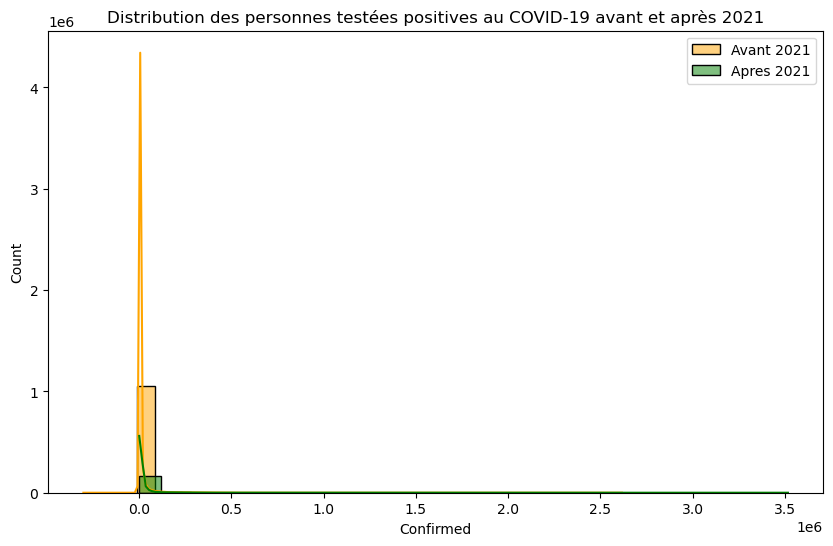

In [23]:
# Visualisation des distributions personnes testées positives avant et après 2021
plt.figure(figsize=(10, 6))
sns.histplot(df_avant_annee, color = "orange", label = "Avant 2021", kde = True, bins = 30)
sns.histplot(df_apres_annee, color = "green", label = "Apres 2021", kde = True, bins = 30)
plt.legend()
plt.title("Distribution des personnes testées positives au COVID-19 avant et après 2021")
plt.show()

In [11]:
# Matrice de correlation entre les variables
plt.figure(figsize=(10, 6))
sns.heatmap(df_nettoye[["Confirmed", "Recovered", "Deaths"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation entre les personnes testées positives, les rétablies, les décédées")
plt.show()

===================================== Resultat du Test de shapiro: =================================
Statistic du test de shapiro 0.062320012109062795
P-value du test de shapiro 3.4256691627008007e-239
